In [18]:
import rasterio
import numpy as np
import matplotlib as mpl
import subprocess
from matplotlib import pyplot
import geopandas as gpd
import os, math
from matplotlib import pyplot as plt

from l8qa.qa import cloud_confidence
from utils.landsatHepers import *

In [2]:
vn_reservoirs_path = 'vnreservoirs/VN_Reservoirs.shp'
df = gpd.read_file(vn_reservoirs_path)
plt.rcParams['figure.figsize'] = 7,7
ho_tri_an = df[df.AREA_SKM == 277.4]

In [21]:
root = 'Landsat8/'

for _, folders, __ in os.walk(root):
    break

for dir in folders:
    file = os.path.join(root, dir, dir + '_NDWI2.TIF')
    ndwiGeotiffFile = rasterio.open(file, 'r')
    ndwiData, originalTransform = getMaskFromShape(ho_tri_an, ndwiGeotiffFile)
    newGeotiffFile = 'TriAn_' + dir.split('_')[3] + '.TIF'
    newGeotiffFile = os.path.join(root, dir, newGeotiffFile)
    newGeotiffFile = rasterio.open(newGeotiffFile, 'w', driver='GTiff',
                  height=ndwiData.shape[0],width=ndwiData.shape[1],count=1,
                  dtype=rasterio.float32,crs=ndwiGeotiffFile.crs,transform=originalTransform)
    newGeotiffFile.write(ndwiData, 1)
    newGeotiffFile.close()
    
    qaGeotiffFile = os.path.join(root, dir, dir + '_BQA.TIF')
    qaGeotiffFile = rasterio.open(qaGeotiffFile, 'r')
    qaData, originalTransform = getMaskFromShape(ho_tri_an, qaGeotiffFile)
    cloudData = cloud_confidence(qaData) == 3
    newQaGeotiffFile = 'TriAn_' + dir.split('_')[3] + '_BQA.TIF'
    newQaGeotiffFile = os.path.join(root, dir, newQaGeotiffFile)
    newQaGeotiffFile = rasterio.open(newQaGeotiffFile, 'w', driver='GTiff',
                  height=cloudData.shape[0],width=cloudData.shape[1],count=1,
                  dtype=rasterio.uint8,crs=qaGeotiffFile.crs,transform=originalTransform)
    newQaGeotiffFile.write(cloudData, 1)
    newQaGeotiffFile.close()

ValueError: the array's dtype 'bool' does not match the file's dtype 'uint8'

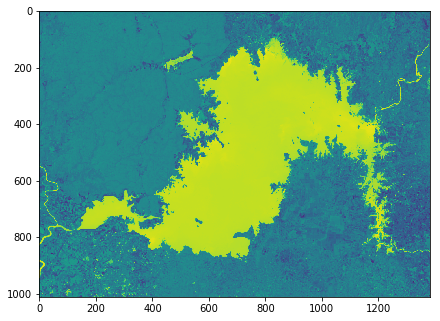

In [17]:
root = 'Landsat8/'

for _, folders, __ in os.walk(root):
    break

for dir in folders:
    file = os.path.join(root, dir, 'TriAn_' + dir.split('_')[3] + '.TIF')
    ndwiGeotiffFile = rasterio.open(file, 'r').read(1)
    plt.imshow(ndwiGeotiffFile)

## Landsat QA Processing

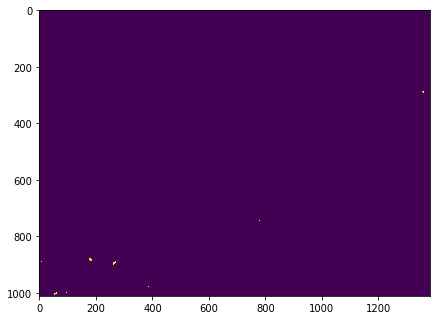

In [16]:
file_qa = 'Landsat8/LC08_L1TP_124052_20170311_20170317_01_T1/LC08_L1TP_124052_20170311_20170317_01_T1_BQA.TIF'
# file_qa = 'Landsat8/LC08_L1TP_124052_20170530_20170615_01_T1/LC08_L1TP_124052_20170530_20170615_01_T1_BQA.TIF'
qa_data = rasterio.open(file_qa, 'r')
qa_data, originalTransform = getMaskFromShape(ho_tri_an, qa_data)
cloud = cloud_confidence(qa_data) == 3
plt.imshow(cloud)